<a href="https://colab.research.google.com/github/solharsh/ud120-projects/blob/master/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/solharsh/ud120-projects

Cloning into 'ud120-projects'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5052 (delta 1), reused 0 (delta 0), pack-reused 5046
Receiving objects: 100% (5052/5052), 19.71 MiB | 21.80 MiB/s, done.
Resolving deltas: 100% (4373/4373), done.


# K-Means



    Introduced K-Means, one of the most famous algorithm of Unsupervised Learning.
    First we randomly place two (or any other number, definitely less than the number of data point, and in this example, intuitively we pick number two) cluster center.
    Next, we're assigning all the data points to whichever cluster closest to them.
    Then we move into optimize step, where the cluster move to the position closest to all weighted average of distance data points assigned to each cluster.
    Then we're keep iterating assign and optimize until the cluster is no longer move.



# K-Means Limitation

The initial position for each of the cluster is random (or we can choose). But the initial position can be greatly decided the outcome of the clustering. It can be as we wanted or it doesn't. Some said that that point, in order for not to be at all random, directly assigned of the exact position of the data.

Local Minima

To solve for this, you can make n-times doing clustering for your data. And pick the cluster by vote.

To play around in the visualization of K-Means, check this link

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/



In [0]:
#In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; 
#since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering. 
#Nonetheless, you’ll get some hands-on practice with k-means in this project, 
#and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

In [0]:
%load /content/ud120-projects/k_means/k_means_cluster.py

In [5]:
%pylab inline
#Populating the interactive namespace from numpy and matplotlib

Populating the interactive namespace from numpy and matplotlib


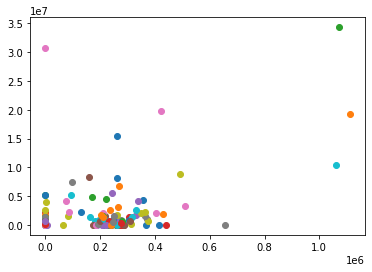

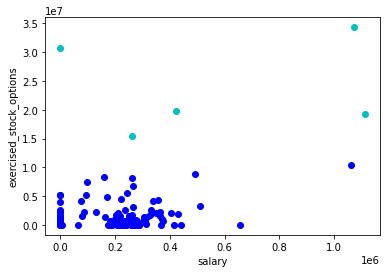

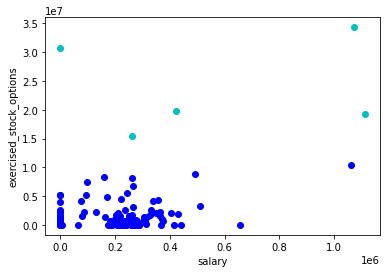

In [19]:
#!/usr/bin/python 

""" 
    skeleton code for k-means clustering mini-project

"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("/content/ud120-projects/tools")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than 4 clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("/content/ud120-projects/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()



from sklearn.cluster import KMeans
features_list = ["poi", feature_1, feature_2]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")

In [13]:
ls /content/ud120-projects/tools/

email_authors.pkl    parse_out_email_text.py    python2_lesson14_keys.pkl
email_preprocess.py  python2_lesson06_keys.pkl  startup.py
feature_format.py    python2_lesson13_keys.pkl  word_data.pkl


In [15]:
cat /content/ud120-projects/tools/feature_format.py

#!/usr/bin/python

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes tha

In [18]:
!echo #!/usr/bin/python

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print ("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features >> feature_format.py

Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. In the scatterplot that pops up, are the clusters what you expected?


Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

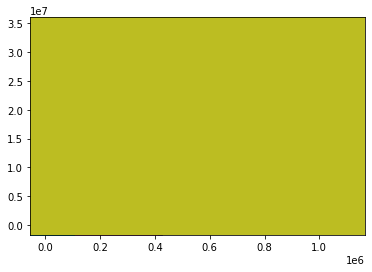

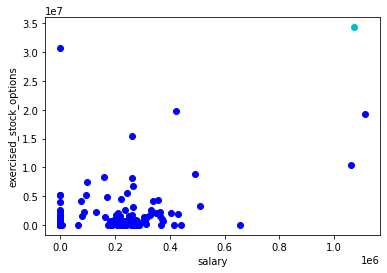

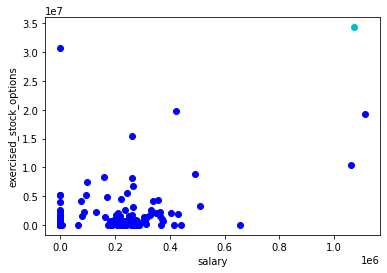

In [21]:
#!/usr/bin/python 

""" 
    skeleton code for k-means clustering mini-project

"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("/content/ud120-projects/tools")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than 4 clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("/content/ud120-projects/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2,feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, line below assumes 2 features)
for f1, f2,f3 in finance_features:
    plt.scatter( f1, f2,f3 )
plt.show()



from sklearn.cluster import KMeans
features_list = ["poi", feature_1, feature_2,feature_3]
data2 = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data2 )
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
Draw(pred, finance_features, poi, name="clusters_before_scaling.pdf", f1_name=feature_1, f2_name=feature_2)


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")


4 points switch clusters

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)


In [22]:
ex_stok = []
for users in data_dict:
    val = data_dict[users]["exercised_stock_options"]
    if val == 'NaN':
        continue
    ex_stok.append(val)
print (max(ex_stok))
print (min(ex_stok))

34348384
3285


In [23]:
#What are the maximum and minimum values taken by “salary”?

salary = []
for users in data_dict:
    val = data_dict[users]["salary"]
    if val == 'NaN':
        continue
    salary.append(val)
    
print (max(salary))
print (min(salary))

1111258
477




The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--which point(s) switch their associated cluster?
